## https://www.kaggle.com/gpreda/bengali-ai-handwritten-grapheme-getting-started

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import PIL.Image
import time
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

%matplotlib inline

pd.options.display.max_rows = 10000
#pd.options.display.max_columns = None
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 100

In [2]:
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/train.csv
../input/train_image_data_3.parquet
../input/test_image_data_0.parquet
../input/class_map.csv
../input/test.csv
../input/train_image_data_2.parquet
../input/sample_submission.csv
../input/test_image_data_2.parquet
../input/train_image_data_0.parquet
../input/test_image_data_1.parquet
../input/train_image_data_1.parquet
../input/test_image_data_3.parquet


In [3]:
DATA_FOLDER = '../input/'
train_df = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'))
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [4]:
train_df.shape

(200840, 5)

In [5]:
test_df = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))
test_df.head()

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root


In [6]:
test_df.shape

(36, 3)

In [7]:
class_map_df = pd.read_csv(os.path.join(DATA_FOLDER, 'class_map.csv'))
class_map_df.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [8]:
class_map_df.shape

(186, 3)

In [9]:
sample_submission_df = pd.read_csv(os.path.join(DATA_FOLDER, 'sample_submission.csv'))
sample_submission_df.head()

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,0
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,0


In [10]:
sample_submission_df.shape

(36, 2)

In [11]:
start_time = time.time()
train_0_df = pd.read_parquet(os.path.join(DATA_FOLDER, 'train_image_data_0.parquet'))
print(f'train_image_data_0 read in {round(time.time()-start_time,2)} sec')

train_image_data_0 read in 4.29 sec


In [12]:
train_0_df.shape

(50210, 32333)

In [13]:
train_0_df.head()

,image_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,31832,31833,31834,31835,31836,31837,31838,31839,31840,31841,31842,31843,31844,31845,31846,31847,31848,31849,31850,31851,31852,31853,31854,31855,31856,31857,31858,31859,31860,31861,31862,31863,31864,31865,31866,31867,31868,31869,31870,31871,31872,31873,31874,31875,31876,31877,31878,31879,31880,31881,31882,31883,31884,31885,31886,31887,31888,31889,31890,31891,31892,31893,31894,31895,31896,31897,31898,31899,31900,31901,31902,31903,31904,31905,31906,31907,31908,31909,31910,31911,31912,31913,31914,31915,31916,31917,31918,31919,31920,31921,31922,31923,31924,31925,31926,31927,31928,31929,31930,31931,31932,31933,31934,31935,31936,31937,31938,31939,31940,31941,31942,31943,31944,31945,31946,31947,31948,31949,31950,31951,31952,31953,31954,31955,31956,31957,31958,31959,31960,31961,31962,31963,31964,31965,31966,31967,31968,31969,31970,31971,31972,31973,31974,31975,31976,31977,31978,31979,31980,31981,31982,31983,31984,31985,31986,31987,31988,31989,31990,31991,31992,31993,31994,31995,31996,31997,31998,31999,32000,32001,32002,32003,32004,32005,32006,32007,32008,32009,32010,32011,32012,32013,32014,32015,32016,32017,32018,32019,32020,32021,32022,32023,32024,32025,32026,32027,32028,32029,32030,32031,32032,32033,32034,32035,32036,32037,32038,32039,32040,32041,32042,32043,32044,32045,32046,32047,32048,32049,32050,32051,32052,32053,32054,32055,32056,32057,32058,32059,32060,32061,32062,32063,32064,32065,32066,32067,32068,32069,32070,32071,32072,32073,32074,32075,32076,32077,32078,32079,32080,32081,32082,32083,32084,32085,32086,32087,32088,32089,32090,32091,32092,32093,32094,32095,32096,32097,32098,32099,32100,32101,32102,32103,32104,32105,32106,32107,32108,32109,32110,32111,32112,32113,32114,32115,32116,32117,32118,32119,32120,32121,32122,32123,32124,32125,32126,32127,32128,32129,32130,32131,32132,32133,32134,32135,32136,32137,32138,32139,32140,32141,32142,32143,32144,32145,32146,32147,32148,32149,32150,32151,32152,32153,32154,32155,32156,32157,32158,32159,32160,32161,32162,32163,32164,32165,32166,32167,32168,32169,32170,32171,32172,32173,32174,32175,32176,32177,32178,32179,32180,32181,

In [14]:
start_time = time.time()
train_1_df = pd.read_parquet(os.path.join(DATA_FOLDER, 'train_image_data_1.parquet'))
print(f'train_image_data_1 read in {round(time.time()-start_time,2)} sec')

train_image_data_1 read in 4.22 sec


In [15]:
train_1_df.shape

(50210, 32333)

In [16]:
train_1_df.head()

,image_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,31832,31833,31834,31835,31836,31837,31838,31839,31840,31841,31842,31843,31844,31845,31846,31847,31848,31849,31850,31851,31852,31853,31854,31855,31856,31857,31858,31859,31860,31861,31862,31863,31864,31865,31866,31867,31868,31869,31870,31871,31872,31873,31874,31875,31876,31877,31878,31879,31880,31881,31882,31883,31884,31885,31886,31887,31888,31889,31890,31891,31892,31893,31894,31895,31896,31897,31898,31899,31900,31901,31902,31903,31904,31905,31906,31907,31908,31909,31910,31911,31912,31913,31914,31915,31916,31917,31918,31919,31920,31921,31922,31923,31924,31925,31926,31927,31928,31929,31930,31931,31932,31933,31934,31935,31936,31937,31938,31939,31940,31941,31942,31943,31944,31945,31946,31947,31948,31949,31950,31951,31952,31953,31954,31955,31956,31957,31958,31959,31960,31961,31962,31963,31964,31965,31966,31967,31968,31969,31970,31971,31972,31973,31974,31975,31976,31977,31978,31979,31980,31981,31982,31983,31984,31985,31986,31987,31988,31989,31990,31991,31992,31993,31994,31995,31996,31997,31998,31999,32000,32001,32002,32003,32004,32005,32006,32007,32008,32009,32010,32011,32012,32013,32014,32015,32016,32017,32018,32019,32020,32021,32022,32023,32024,32025,32026,32027,32028,32029,32030,32031,32032,32033,32034,32035,32036,32037,32038,32039,32040,32041,32042,32043,32044,32045,32046,32047,32048,32049,32050,32051,32052,32053,32054,32055,32056,32057,32058,32059,32060,32061,32062,32063,32064,32065,32066,32067,32068,32069,32070,32071,32072,32073,32074,32075,32076,32077,32078,32079,32080,32081,32082,32083,32084,32085,32086,32087,32088,32089,32090,32091,32092,32093,32094,32095,32096,32097,32098,32099,32100,32101,32102,32103,32104,32105,32106,32107,32108,32109,32110,32111,32112,32113,32114,32115,32116,32117,32118,32119,32120,32121,32122,32123,32124,32125,32126,32127,32128,32129,32130,32131,32132,32133,32134,32135,32136,32137,32138,32139,32140,32141,32142,32143,32144,32145,32146,32147,32148,32149,32150,32151,32152,32153,32154,32155,32156,32157,32158,32159,32160,32161,32162,32163,32164,32165,32166,32167,32168,32169,32170,32171,32172,32173,32174,32175,32176,32177,32178,32179,32180,32181,

In [17]:
start_time = time.time()
test_0_df = pd.read_parquet(os.path.join(DATA_FOLDER, 'test_image_data_0.parquet'))
print(f'test_image_data_0 read in {round(time.time()-start_time,2)} sec')

test_image_data_0 read in 1.97 sec


In [18]:
test_0_df.shape

(3, 32333)

In [19]:
test_0_df.head()

,image_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,31832,31833,31834,31835,31836,31837,31838,31839,31840,31841,31842,31843,31844,31845,31846,31847,31848,31849,31850,31851,31852,31853,31854,31855,31856,31857,31858,31859,31860,31861,31862,31863,31864,31865,31866,31867,31868,31869,31870,31871,31872,31873,31874,31875,31876,31877,31878,31879,31880,31881,31882,31883,31884,31885,31886,31887,31888,31889,31890,31891,31892,31893,31894,31895,31896,31897,31898,31899,31900,31901,31902,31903,31904,31905,31906,31907,31908,31909,31910,31911,31912,31913,31914,31915,31916,31917,31918,31919,31920,31921,31922,31923,31924,31925,31926,31927,31928,31929,31930,31931,31932,31933,31934,31935,31936,31937,31938,31939,31940,31941,31942,31943,31944,31945,31946,31947,31948,31949,31950,31951,31952,31953,31954,31955,31956,31957,31958,31959,31960,31961,31962,31963,31964,31965,31966,31967,31968,31969,31970,31971,31972,31973,31974,31975,31976,31977,31978,31979,31980,31981,31982,31983,31984,31985,31986,31987,31988,31989,31990,31991,31992,31993,31994,31995,31996,31997,31998,31999,32000,32001,32002,32003,32004,32005,32006,32007,32008,32009,32010,32011,32012,32013,32014,32015,32016,32017,32018,32019,32020,32021,32022,32023,32024,32025,32026,32027,32028,32029,32030,32031,32032,32033,32034,32035,32036,32037,32038,32039,32040,32041,32042,32043,32044,32045,32046,32047,32048,32049,32050,32051,32052,32053,32054,32055,32056,32057,32058,32059,32060,32061,32062,32063,32064,32065,32066,32067,32068,32069,32070,32071,32072,32073,32074,32075,32076,32077,32078,32079,32080,32081,32082,32083,32084,32085,32086,32087,32088,32089,32090,32091,32092,32093,32094,32095,32096,32097,32098,32099,32100,32101,32102,32103,32104,32105,32106,32107,32108,32109,32110,32111,32112,32113,32114,32115,32116,32117,32118,32119,32120,32121,32122,32123,32124,32125,32126,32127,32128,32129,32130,32131,32132,32133,32134,32135,32136,32137,32138,32139,32140,32141,32142,32143,32144,32145,32146,32147,32148,32149,32150,32151,32152,32153,32154,32155,32156,32157,32158,32159,32160,32161,32162,32163,32164,32165,32166,32167,32168,32169,32170,32171,32172,32173,32174,32175,32176,32177,32178,32179,32180,32181,

In [20]:
print(f'Train: unique grapheme roots: {train_df.grapheme_root.nunique()}')
print(f'Train: unique vowel diacritics: {train_df.vowel_diacritic.nunique()}')
print(f'Train: unique consonant diacritics: {train_df.consonant_diacritic.nunique()}')
print(f'Train: total unique elements: {train_df.grapheme_root.nunique()+train_df.vowel_diacritic.nunique()+train_df.consonant_diacritic.nunique()}')
print(f'Class map: unique elements: \n{class_map_df.component_type.value_counts()}')
print(f'Total combinations: {pd.DataFrame(train_df.groupby(["grapheme_root","vowel_diacritic","consonant_diacritic"])).shape[0]}')

Train: unique grapheme roots: 168
Train: unique vowel diacritics: 11
Train: unique consonant diacritics: 7
Train: total unique elements: 186
Class map: unique elements: 
grapheme_root          168
vowel_diacritic         11
consonant_diacritic      7
Name: component_type, dtype: int64
Total combinations: 1292


In [21]:
cm_gr = class_map_df.loc[(class_map_df.component_type=='grapheme_root'), 'component'].values
cm_vd = class_map_df.loc[(class_map_df.component_type=='vowel_diacritic'), 'component'].values
cm_cd = class_map_df.loc[(class_map_df.component_type=='consonant_diacritic'), 'component'].values

print(f'grapheme root:\n{15*"-"}\n{cm_gr}\n\nvowel diacritic:\n{18*"-"}\n{cm_vd}\n\nconsonant diacritic:\n{20*"-"}\n{cm_cd}')

grapheme root:
---------------
['ং' 'ঃ' 'অ' 'আ' 'ই' 'ঈ' 'উ' 'ঊ' 'ঋ' 'এ' 'ঐ' 'ও' 'ঔ' 'ক' 'ক্ক' 'ক্ট' 'ক্ত'
 'ক্ল' 'ক্ষ' 'ক্ষ্ণ' 'ক্ষ্ম' 'ক্স' 'খ' 'গ' 'গ্ধ' 'গ্ন' 'গ্ব' 'গ্ম' 'গ্ল'
 'ঘ' 'ঘ্ন' 'ঙ' 'ঙ্ক' 'ঙ্ক্ত' 'ঙ্ক্ষ' 'ঙ্খ' 'ঙ্গ' 'ঙ্ঘ' 'চ' 'চ্চ' 'চ্ছ'
 'চ্ছ্ব' 'ছ' 'জ' 'জ্জ' 'জ্জ্ব' 'জ্ঞ' 'জ্ব' 'ঝ' 'ঞ' 'ঞ্চ' 'ঞ্ছ' 'ঞ্জ' 'ট'
 'ট্ট' 'ঠ' 'ড' 'ড্ড' 'ঢ' 'ণ' 'ণ্ট' 'ণ্ঠ' 'ণ্ড' 'ণ্ণ' 'ত' 'ত্ত' 'ত্ত্ব'
 'ত্থ' 'ত্ন' 'ত্ব' 'ত্ম' 'থ' 'দ' 'দ্ঘ' 'দ্দ' 'দ্ধ' 'দ্ব' 'দ্ভ' 'দ্ম' 'ধ'
 'ধ্ব' 'ন' 'ন্জ' 'ন্ট' 'ন্ঠ' 'ন্ড' 'ন্ত' 'ন্ত্ব' 'ন্থ' 'ন্দ' 'ন্দ্ব' 'ন্ধ'
 'ন্ন' 'ন্ব' 'ন্ম' 'ন্স' 'প' 'প্ট' 'প্ত' 'প্ন' 'প্প' 'প্ল' 'প্স' 'ফ' 'ফ্ট'
 'ফ্ফ' 'ফ্ল' 'ব' 'ব্জ' 'ব্দ' 'ব্ধ' 'ব্ব' 'ব্ল' 'ভ' 'ভ্ল' 'ম' 'ম্ন' 'ম্প'
 'ম্ব' 'ম্ভ' 'ম্ম' 'ম্ল' 'য' 'র' 'ল' 'ল্ক' 'ল্গ' 'ল্ট' 'ল্ড' 'ল্প' 'ল্ব'
 'ল্ম' 'ল্ল' 'শ' 'শ্চ' 'শ্ন' 'শ্ব' 'শ্ম' 'শ্ল' 'ষ' 'ষ্ক' 'ষ্ট' 'ষ্ঠ' 'ষ্ণ'
 'ষ্প' 'ষ্ফ' 'ষ্ম' 'স' 'স্ক' 'স্ট' 'স্ত' 'স্থ' 'স্ন' 'স্প' 'স্ফ' 'স্ব'
 'স্ম' 'স্ল' 'স্স' 'হ' 'হ্ন' 'হ্ব' 'হ্ম' 'হ্ল' 'ৎ' 'ড়' 'ঢ়' 'য়']

vowel diacritic:
---------

In [22]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        vc = data[col].value_counts()
        items.append(vc.index[0])
        vals.append(vc.values[0])
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals/total*100, 3)
    return np.transpose(tt)

In [23]:
most_frequent_values(train_df)

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
Total,200840,200840,200840,200840,200840
Most frequent item,Train_133029,72,0,0,য়ে
Frequence,1,5736,41508,125278,283
Percent from total,0,2.856,20.667,62.377,0.141


In [24]:
most_frequent_values(test_df)

,row_id,image_id,component
Total,36,36,36
Most frequent item,Test_10_grapheme_root,Test_5,vowel_diacritic
Frequence,1,3,12
Percent from total,2.778,8.333,33.333


In [30]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order=df[feature].value_counts().index[:20], palette='Set3')
    g.set_title(f'Number and percentage of {title}')
    if size>2:
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height+3, '{:1.2f}%'.format(100*height/total), ha='center')
    plt.show()

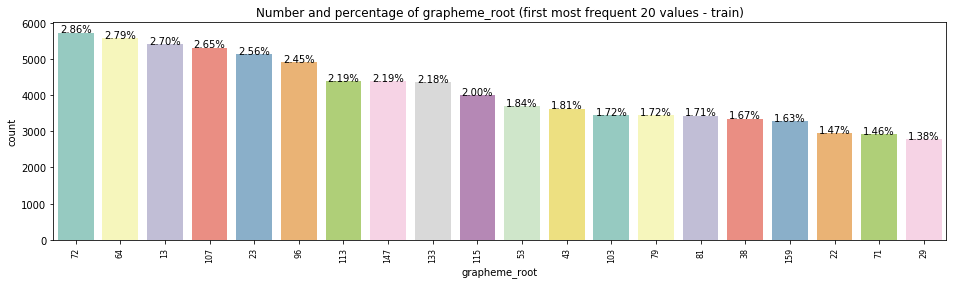

In [31]:
plot_count('grapheme_root', 'grapheme_root (first most frequent 20 values - train)', train_df, size=4)

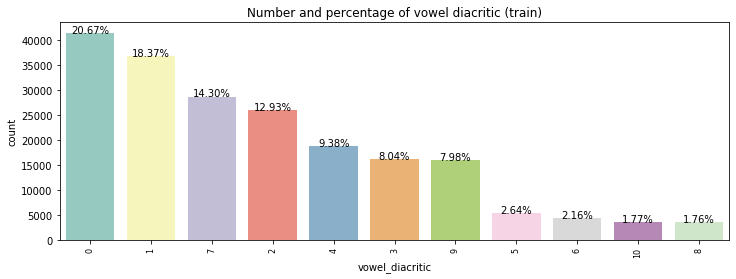

In [32]:
plot_count('vowel_diacritic', 'vowel diacritic (train)', train_df, size=3)

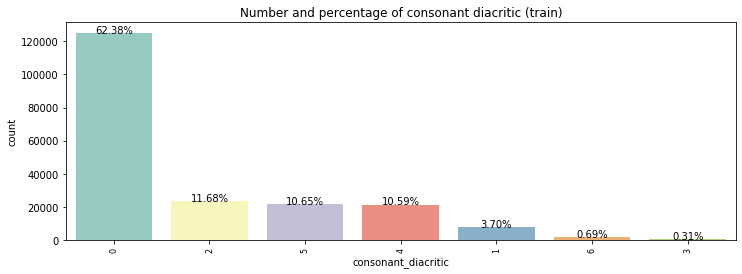

In [33]:
plot_count('consonant_diacritic', 'consonant diacritic (train)', train_df, size=3)

In [36]:
def plot_count_heatmap(feature1, feature2, df, size=1):
    tmp = df.groupby([feature1, feature2])['grapheme'].count()
    df = tmp.reset_index()
    df_m = df.pivot(feature1, feature2, 'grapheme')
    f, ax = plt.subplots(figsize=(9, size*4))
    sns.heatmap(df_m, annot=True, fmt='3.0f', linewidths=.5, ax=ax)

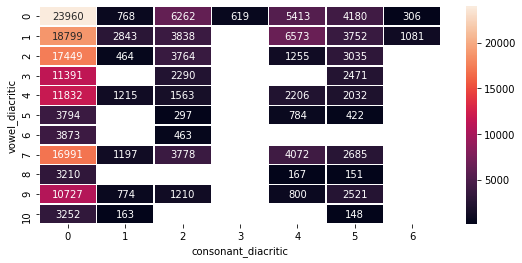

In [37]:
plot_count_heatmap('vowel_diacritic','consonant_diacritic', train_df)

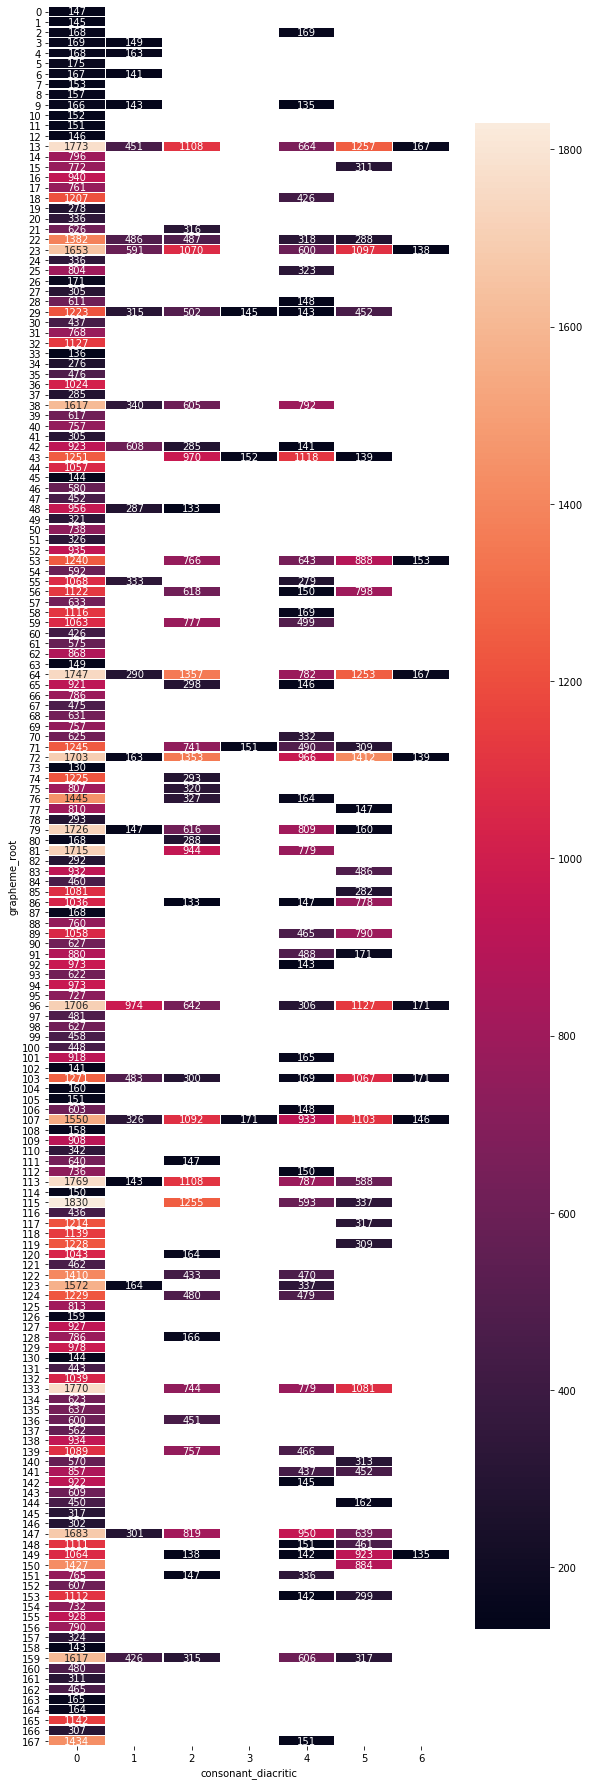

In [38]:
plot_count_heatmap('grapheme_root','consonant_diacritic', train_df, size=8)

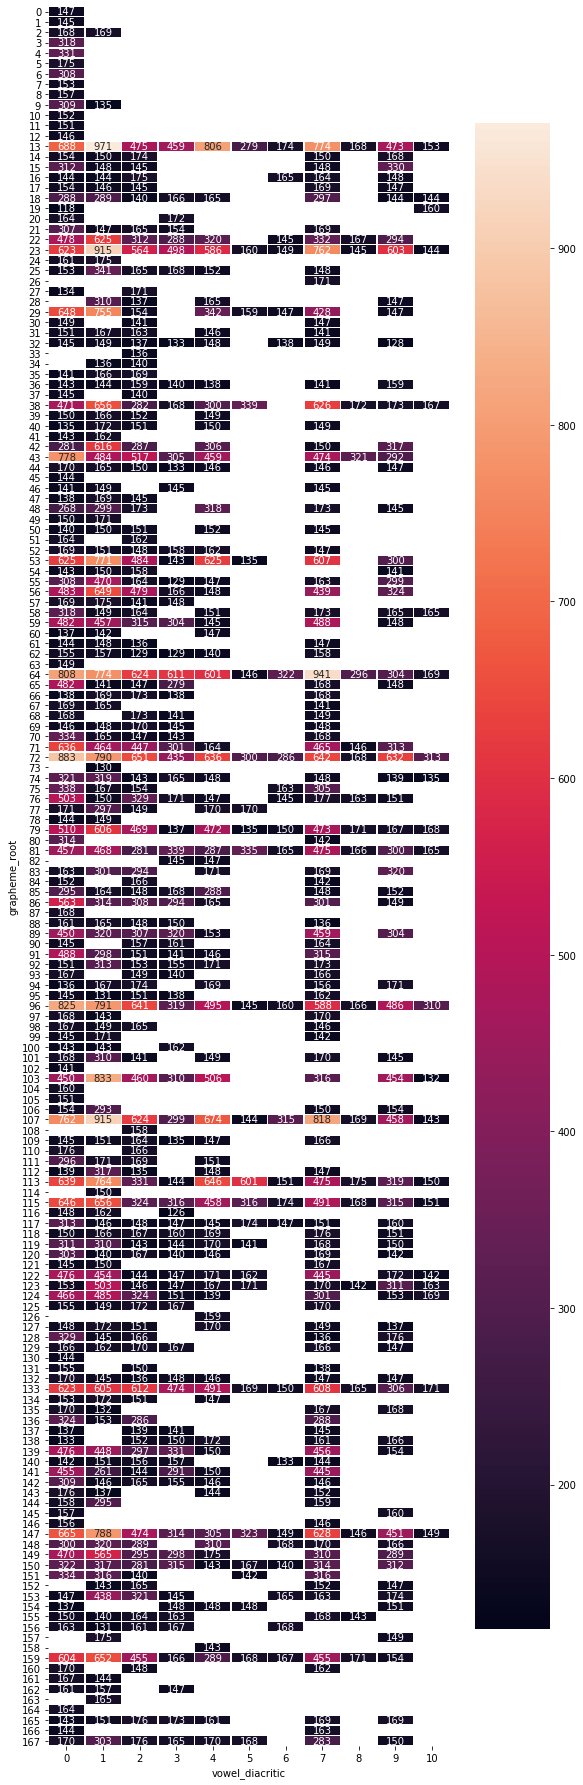

In [39]:
plot_count_heatmap('grapheme_root','vowel_diacritic', train_df, size=8)

In [44]:
def display_image_from_data(data_df, size=5):
    fig, ax = plt.subplots(size, size, figsize=(12,12))
    for i, index in enumerate(data_df.index):
        image_id = data_df.iloc[i]['image_id']
        flattened_image = data_df.iloc[i].drop('image_id').values.astype(np.uint8)
        unpacked_image = PIL.Image.fromarray(flattened_image.reshape(137,236))
        
        ax[i//size, i%size].imshow(unpacked_image)
        ax[i//size, i%size].set_title(image_id)
        ax[i//size, i%size].axis('on')
    plt.show()

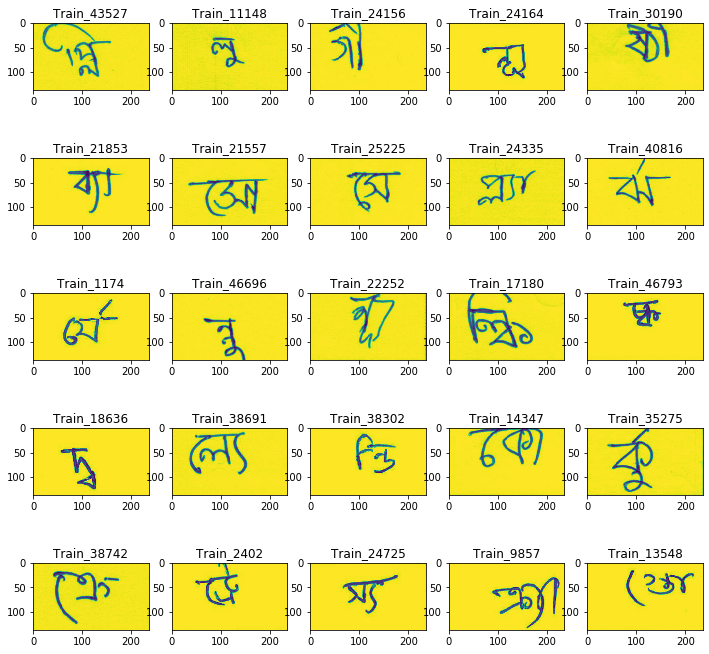

In [45]:
display_image_from_data(train_0_df.sample(25))

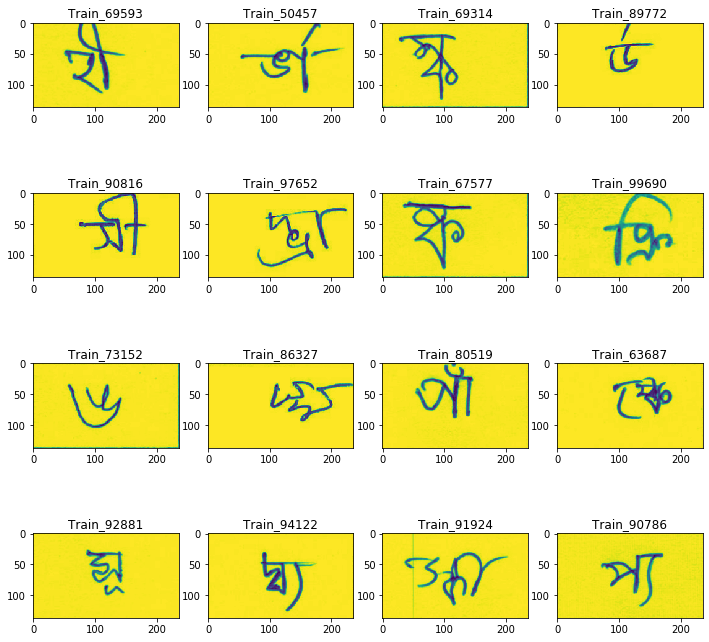

In [46]:
display_image_from_data(train_1_df.sample(16), size=4)

In [47]:
def display_writting_variety(data_df=train_0_df, grapheme_root=72, vowel_diacritic=0, consonant_diacritic=0, size=5):
    sample_train_df = train_df.loc[(train_df.grapheme_root == grapheme_root) & \
                                  (train_df.vowel_diacritic == vowel_diacritic) & \
                                  (train_df.consonant_diacritic == consonant_diacritic)]
    print(f'total: {sample_train_df.shape}')
    sample_df = data_df.merge(sample_train_df.image_id, how='inner')
    print(f'total: {sample_df.shape}')
    gr = sample_train_df.iloc[0]['grapheme']
    cm_gr = class_map_df.loc[(class_map_df.component_type == 'grapheme_root') & \
                            (class_map_df.label == grapheme_root), 'component'].values[0]
    cm_vd = class_map_df.loc[(class_map_df.component_type == 'vowel_diacritic') & \
                            (class_map_df.label == vowel_diacritic), 'component'].values[0]
    cm_cd = class_map_df.loc[(class_map_df.component_type == 'consonant_diacritic') & \
                            (class_map_df.label == consonant_diacritic), 'component'].values[0]
    print(f'grapheme: {gr}, grapheme root: {cm_gr}, vowel diacritic: {cm_vd}, consonant diacritic: {cm_cd}')
    sample_df = sample_df.sample(size*size)
    display_image_from_data(sample_df, size=size)

total: (163, 5)
total: (36, 32333)
grapheme: দাঁ, grapheme root: দ, vowel diacritic: া, consonant diacritic: ঁ


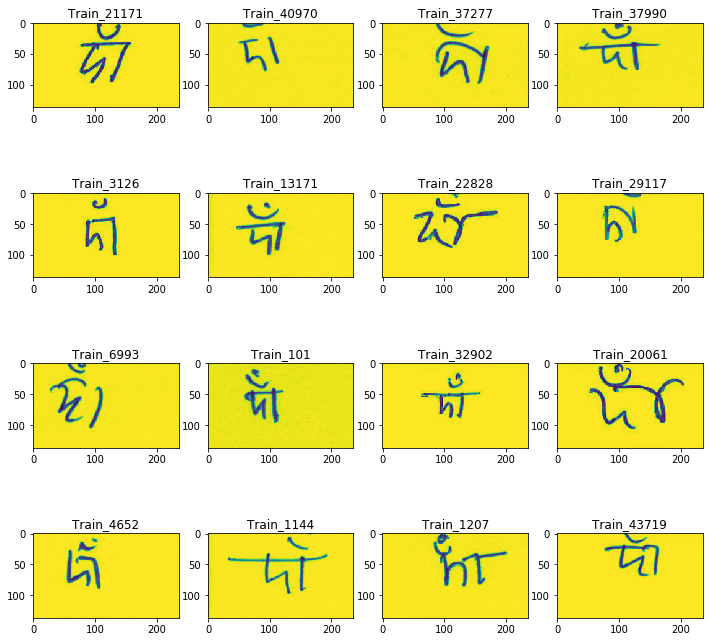

In [48]:
display_writting_variety(train_0_df, 72, 1, 1, 4)

total: (150, 5)
total: (29, 32333)
grapheme: র্তা, grapheme root: ত, vowel diacritic: া, consonant diacritic: র্


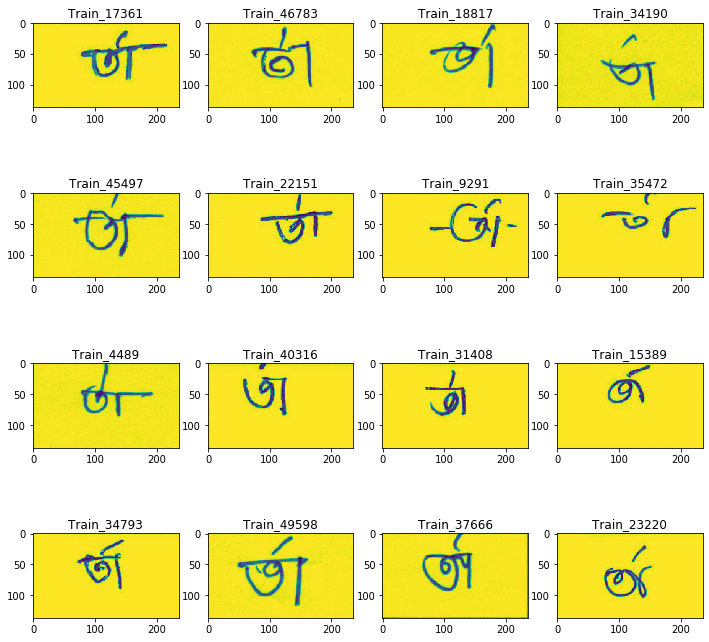

In [49]:
display_writting_variety(train_0_df, 64, 1, 2, 4)

total: (175, 5)
total: (38, 32333)
grapheme: ক, grapheme root: ক, vowel diacritic: 0, consonant diacritic: 0


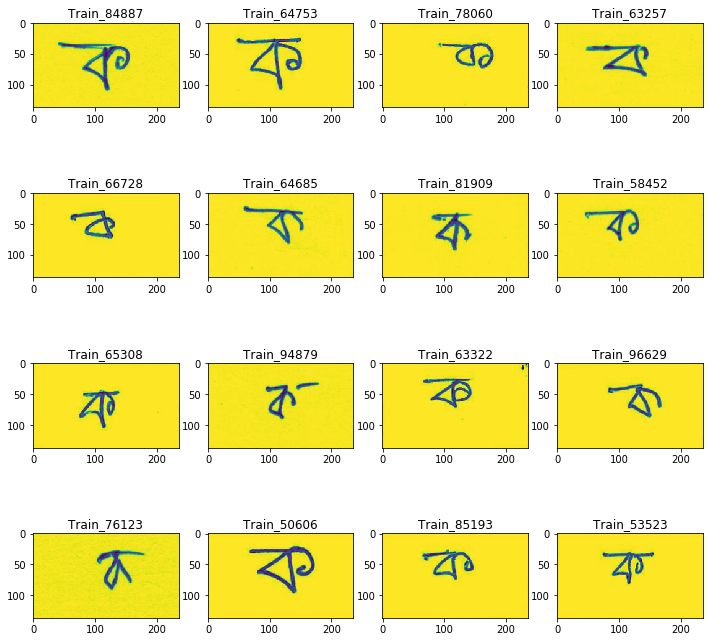

In [50]:
display_writting_variety(train_1_df, 13, 0, 0, 4)

total: (167, 5)
total: (46, 32333)
grapheme: র্গী, grapheme root: গ, vowel diacritic: ী, consonant diacritic: র্


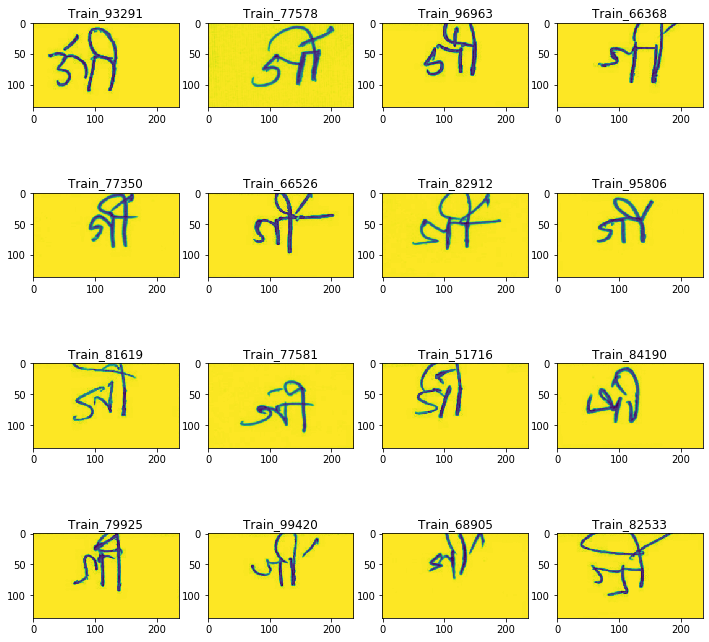

In [51]:
display_writting_variety(train_1_df, 23, 3, 2, 4)